# Sprachgenerierung

Auch in dieser Woche beschäftigen wir uns mit Twitter-Daten. Diesmal geht es jedoch nicht um Sentiment Analysis, sondern wir wollen ein Modell trainieren, das es uns erlaubt, Tweets in einem bestimmten Stil zu generieren.

Als Datengrundlage dienen uns Daten von http://www.trumptwitterarchive.com. Brendan Brown, der Betreiber der Seite hat sämtliche Tweets von Donald Trump seit Mai 2009 zusammengetragen. Da wir die Sprache des US-Präsidenten modellieren wollen, verwenden wir nur dessen eigene und keine Retweets.

Unser Modell wird auf der Ebene von Einzelzeichen arbeiten, zunächst wollen wir uns aber auf einer höheren Ebene einen Überblick über den Datensatz verschaffen.

## 1. Aufgabe: Überblick über den Datensatz
### 1.1 Datensatz einlesen
Lest den in der Datei ```all_tweets.json``` enthaltenen Datensatz in einen Pandas-Dataframe mit folgenden Spalten ein: ```created_at```, ```id```, ```text```. Die übrigen im JSON enthaltenen Felder können ignoriert werden.



In [1]:
import pandas as pd
import json

input_file = open("all_tweets.json")
json_array = json.load(input_file)
tweets = pd.DataFrame(json_array, columns=["created_at", "id_str", "text"])

tweets

,created_at,id_str,text
0,Sun Apr 28 12:59:53 +0000 2019,1122485588580605953,Will be interviewed by @MariaBartiromo on @Fox...
1,Sun Apr 28 03:10:25 +0000 2019,1122337243744497664,"....for the more traditional, but not very bri..."
2,Sun Apr 28 03:10:24 +0000 2019,1122337240330297344,"The Democratic National Committee, sometimes r..."
3,Sun Apr 28 02:57:32 +0000 2019,1122334000519868416,....Ever since Andrew came to my office to ask...
4,Sun Apr 28 02:57:31 +0000 2019,1122333996451418112,Thank you to brilliant and highly respected at...
5,Sun Apr 28 02:07:11 +0000 2019,1122321330282561536,"Thank you Green Bay, Wisconsin! MAKE AMERICA G..."
6,Sun Apr 28 01:58:39 +0000 2019,1122319181221892096,"Beautiful #TrumpRally tonight in Green Bay, Wi..."
7,Sat Apr 27 23:46:06 +0000 2019,1122285823473401857,"Just arrived in Green Bay, Wisconsin for a #MA..."
8,Sat Apr 27 22:47:01 +0000 2019,1122270956192272385,Sincerest THANK YOU to our great Border Patrol...
9,Sat Apr 27 22:14:25 +0000 2019,1122262750531477504,Great day with Prime Minister @AbeShinzo of Ja...


### 1.2 Jahr hinzufügen
Für unsere Auswertungen interessiert uns nur das Jahr, in dem der Tweet verfasst wurde, nicht das genaue Datum. Wir fügen daher dem Dataframe eine zusätzliche Spalte ```year``` hinzu und verwenden die Pandas-Funktion ```DatetimeIndex```, um aus dem String einen DatetimeIndex zu machen, auf dessen einzelne Felder (```year```, ```month```, ```day```, ...) dann mittels Punktoperator zugegriffen werden kann.

In [2]:
tweets['year'] = pd.DatetimeIndex(tweets['created_at']).year
tweets

,created_at,id_str,text,year
0,Sun Apr 28 12:59:53 +0000 2019,1122485588580605953,Will be interviewed by @MariaBartiromo on @Fox...,2019
1,Sun Apr 28 03:10:25 +0000 2019,1122337243744497664,"....for the more traditional, but not very bri...",2019
2,Sun Apr 28 03:10:24 +0000 2019,1122337240330297344,"The Democratic National Committee, sometimes r...",2019
3,Sun Apr 28 02:57:32 +0000 2019,1122334000519868416,....Ever since Andrew came to my office to ask...,2019
4,Sun Apr 28 02:57:31 +0000 2019,1122333996451418112,Thank you to brilliant and highly respected at...,2019
5,Sun Apr 28 02:07:11 +0000 2019,1122321330282561536,"Thank you Green Bay, Wisconsin! MAKE AMERICA G...",2019
6,Sun Apr 28 01:58:39 +0000 2019,1122319181221892096,"Beautiful #TrumpRally tonight in Green Bay, Wi...",2019
7,Sat Apr 27 23:46:06 +0000 2019,1122285823473401857,"Just arrived in Green Bay, Wisconsin for a #MA...",2019
8,Sat Apr 27 22:47:01 +0000 2019,1122270956192272385,Sincerest THANK YOU to our great Border Patrol...,2019
9,Sat Apr 27 22:14:25 +0000 2019,1122262750531477504,Great day with Prime Minister @AbeShinzo of Ja...,2019


### 1.3 Textlänge analysieren
Naturgemäß gibt es bei Tweets nur eine begrenzte Varianz, was die Textlänge angeht. Wir wollen uns dennoch anschauen, wie sich die Textlänge im Laufe der Jahre entwickelt hat.
Dazu fügen wir unserem Dataframe zunächst eine Spalte ```text_length``` hinzu, in der wir festhalten, welche Länge der jeweilige Tweet-Text hat.

**Hinweis**
Mittels ```apply``` lassen sich Funktionen auf Spalten des Dataframes mappen: ```df['new'] = df['old'].apply(lambda x : fancy_stuff(x))```

In [3]:
tweets['text_length'] = tweets['text'].apply(lambda t : len(t)) 
tweets

,created_at,id_str,text,year,text_length
0,Sun Apr 28 12:59:53 +0000 2019,1122485588580605953,Will be interviewed by @MariaBartiromo on @Fox...,2019,191
1,Sun Apr 28 03:10:25 +0000 2019,1122337243744497664,"....for the more traditional, but not very bri...",2019,177
2,Sun Apr 28 03:10:24 +0000 2019,1122337240330297344,"The Democratic National Committee, sometimes r...",2019,144
3,Sun Apr 28 02:57:32 +0000 2019,1122334000519868416,....Ever since Andrew came to my office to ask...,2019,214
4,Sun Apr 28 02:57:31 +0000 2019,1122333996451418112,Thank you to brilliant and highly respected at...,2019,145
5,Sun Apr 28 02:07:11 +0000 2019,1122321330282561536,"Thank you Green Bay, Wisconsin! MAKE AMERICA G...",2019,82
6,Sun Apr 28 01:58:39 +0000 2019,1122319181221892096,"Beautiful #TrumpRally tonight in Green Bay, Wi...",2019,144
7,Sat Apr 27 23:46:06 +0000 2019,1122285823473401857,"Just arrived in Green Bay, Wisconsin for a #MA...",2019,116
8,Sat Apr 27 22:47:01 +0000 2019,1122270956192272385,Sincerest THANK YOU to our great Border Patrol...,2019,186
9,Sat Apr 27 22:14:25 +0000 2019,1122262750531477504,Great day with Prime Minister @AbeShinzo of Ja...,2019,283


Für einen groben Überblick schauen wir uns einige Kennzahlen zur Textlänge an. Dazu gruppieren wir nach ```year```und nutzen dann die ```describe```-Methode des Dataframes, wobei wir nur Spalten vom Typ ```numpy.number``` betrachten und daher der ```describe```-Methode eine entsprechende ```include```-Liste mitgeben.

In [4]:
import numpy
tweets.groupby(['year']).describe(include=[numpy.number])

text_length                                                           
           count        mean        std   min     25%    50%     75%    max
year                                                                       
2009        56.0  112.214286  20.056932  62.0  103.75  115.0  126.25  140.0
2010       142.0  122.528169  21.394536  45.0  111.00  132.5  138.00  140.0
2011       774.0  107.739018  27.061936  38.0   86.00  114.0  133.00  140.0
2012      3530.0  106.975921  32.147123  12.0   87.00  117.0  135.00  148.0
2013      5775.0   86.123983  43.081747   9.0   41.00   94.0  128.00  152.0
2014      2433.0  114.132758  27.615667  21.0   98.00  124.0  136.00  148.0
2015      3057.0  109.009486  31.873999  15.0   87.00  120.0  137.00  155.0
2016      3465.0  113.363925  30.697098  14.0   93.00  127.0  138.00  148.0
2017      2284.0  133.917688  46.279751   2.0  119.00  138.0  143.00  320.0
2018      3104.0  198.084407  83.564703   8.0  131.00  221.0  277.00  315.0
2019      1075.0  183.999070  92.820761   5.0  102.50  205.0  276.00  302.0

### 1.4. Top-Hashtags und -Mentions
Nachdem wir uns mit der Länge der Texte beschäftigt haben, wollen wir nun herausfinden, wen Donald Trump in seinen Tweets erwähnt und welche Themen er (hash)taggt. Dabei interessiert uns die Entwicklung über die Jahre.

Wir beginnen mit den Hashtags und verwenden zunächst einen kleinen Trick, um ein Dictionary zu erstellen, das für jedes Jahr einen "Sub-Dataframe" enthält. Diese Dataframes bearbeiten wir dann weiter, indem wir deren ```text```-Felder jeweils zu einem langen String konkatenieren: ```' '.join(frame['text']) for frame in ...```
Damit haben wir pro Jahr alle konkatenierten Tweet-Texte, aus denen wir dann die Hashtags extrahieren können. Hierbei machen wir uns noch keine allzu großen Gedanken über Normalisierung, sondern zerlegen die langen Texte in einzelne Tokens, aus denen wir dann die Hashtags herausfiltern. 
Um die Top-Hashtags in Erfahrung zu bringen, verwenden wir wieder ```Counter```.

In [5]:
from collections import Counter

tweets_by_year = dict(list(tweets.groupby(['year'])))
texts_per_year = {year:' '.join(frame['text']) for year, frame in tweets_by_year.items()}
top_hashtags_per_year = {year: Counter([token for token in texts.split() if token.startswith('#')]).most_common(3) for year, texts in texts_per_year.items()}
top_hashtags_per_year

{2009: [],
 2010: [('#EvanForSI', 1)],
 2011: [('#TimeToGetTough', 45), ('#trumpvlog', 23), ('#trumpvlog...', 11)],
 2012: [('#TimeToGetTough', 31), ('#sweepstweet', 19), ('#trumpvlog', 15)],
 2013: [('#CelebApprentice', 127), ('#1', 25), ('#WWEHOF', 15)],
 2014: [('#Oscars', 18), ('#TBT', 13), ('#TrumpVlog', 12)],
 2015: [('#Trump2016', 114),
  ('#MakeAmericaGreatAgain', 104),
  ('#MakeAmericaGreatAgain!', 19)],
 2016: [('#Trump2016', 314),
  ('#MakeAmericaGreatAgain', 204),
  ('#AmericaFirst', 71)],
 2017: [('#USA🇺🇸', 23), ('#MAGA', 13), ('#MAGA🇺🇸', 12)],
 2018: [('#MAGA', 55), ('#MAGA🇺🇸', 15), ('#JobsNotMobs', 6)],
 2019: [('#MAGA', 14), ('#MAGA🇺🇸', 2), ('#RxSummit2019', 2)]}

Als nächstes interessieren uns die Mentions. Wir können hier analog zu den Hashtags vorgehen.

In [6]:
top_mentions_per_year = {year: Counter([token for token in texts.split() if len(token) > 1 and token.startswith('@')]).most_common(3) for year, texts in texts_per_year.items()}
top_mentions_per_year

{2009: [('@IvankaTrump', 1)],
 2010: [('@kingsthings', 1), ('@hollyrpeete', 1)],
 2011: [('@BarackObama', 115), ('@FoxNews', 16), ("@BarackObama's", 15)],
 2012: [('@BarackObama', 347), ('@MittRomney', 179), ("@BarackObama's", 104)],
 2013: [('@ApprenticeNBC', 73), ('@billmaher', 56), ('@CelebApprentice', 37)],
 2014: [('@foxandfriends', 26), ('@TrumpDoral', 24), ('@AGSchneiderman', 20)],
 2015: [('@FoxNews', 56), ('@CNN', 45), ('@foxandfriends', 37)],
 2016: [('@CNN', 54), ('@FoxNews', 43), ('@nytimes', 42)],
 2017: [('@foxandfriends', 35), ('@WhiteHouse', 25), ('@nytimes', 21)],
 2018: [('@FoxNews', 55), ('@foxandfriends', 41), ('@WhiteHouse!', 16)],
 2019: [('@FoxNews', 27), ('@foxandfriends', 24), ('@seanhannity', 10)]}

### 1.5 Vokabular
Bevor wir endgültig auf die Ebene der Einzelzeichen herabsteigen, wollen wir uns das von Trump verwendete Vokabular genauer ansehen und dabei auch herausfinden, ob weitere Vorverarbeitungsschritte nötig sind.

Dazu erstellen wir uns zunächst eine Liste aller Tokens, die in den Dokumenten vorkommen. Wir gruppieren nicht mehr per Jahr, sondern gehen ganz simpel vor und konkatenieren alle Tweet-Texte in einen langen String, den wir dann in einzelne Terme splitten.

Gebt die 20 häufigsten Terme aus. Was fällt auf (insbesondere bei Betrachtung des hinteren Endes der Liste)?

In [7]:
tweet_texts = ' '.join(tweets['text'])
tokens = tweet_texts.split();

Counter(tokens).most_common(20)

[('the', 17252),
 ('to', 11653),
 ('and', 9303),
 ('of', 8246),
 ('a', 7975),
 ('is', 7535),
 ('in', 6777),
 ('for', 5067),
 ('I', 4861),
 ('on', 4842),
 ('be', 4023),
 ('will', 3761),
 ('that', 3217),
 ('are', 3177),
 ('with', 2980),
 ('you', 2963),
 ('at', 2800),
 ('&amp;', 2764),
 ('The', 2759),
 ('have', 2546)]

Welche Nachbarbeitungsschritte könnten im Hinblick auf die spätere Verarbeitung einzelner Zeichen sinnvoll sein?

In [8]:
import html
cleaned_tweet_texts = html.unescape(tweet_texts)

#### Exkursion: SpaCy

[```spaCy```](https://spacy.io/) ist eine recht verbreitete Bibliothek im Bereich NLP. Um damit erste Erfahrungen zu sammeln, tokenisieren wir unsere Texte unter Verwendung des ```nlp```-Objekts erneut und filtern alle Satzzeichen und Stopwörter aus. Aus Performancegründen verarbeiten wir die Texte nacheinander und nicht den konkatenierten Gesamttext.

Was fällt bei der Betrachtung der Top Tokens auf?

**Hinweise**
1. Benutzung von ```spaCy```: ```spaCy``` versieht die Tokens mit zusätzlichen Informationen zum Beispiel darüber, ob es sich bei dem Token um ein Stopwort oder ein Satzzeichen handelt (https://spacy.io/api/token). Wenn wir nur am Text interessiert sind, können wir auf diesen mittels ```token.text``` zugreifen. Ob es sich um ein Stopwort handelt, verrät ```token.is_stop```, ```token.is_punct``` gibt zurück, ob es sich bei dem entsprechenden Token um ein Satzzeichen handelt.
2. Aufwand: Beim Betrachten der Top 20 Tokens sollte deutlich werden, dass auch der Rückgriff auf "Out-of-the-box"-Lösungen nicht heißt, dass Nachdenken unnötig wird. Wir wollen das aber an dieser Stelle nicht weiter vertiefen, weil wir ohnehin auf Zeichenebene arbeiten wollen.

In [9]:
import spacy

nlp = spacy.load('en', disable=['ner', 'tagger', 'parser', 'textcat'])
tweet_list = list(tweets['text'])
nlp_docs = [nlp(html.unescape(tweet)) for tweet in tweet_list]
nlp_annotated_tokens = [token for doc in nlp_docs for token in doc]
nlp_tokens = [token.text for token in nlp_annotated_tokens if not token.is_stop and not token.is_punct]
Counter(nlp_tokens).most_common(20)

[(' ', 3628),
 ('great', 2415),
 ('Trump', 2128),
 ('’s', 1568),
 ('\n', 1566),
 ('people', 1490),
 ('Obama', 1412),
 ('Thank', 1313),
 ('Great', 985),
 ('n’t', 982),
 ('time', 920),
 ('Thanks', 891),
 ('President', 864),
 ('$', 767),
 ('U.S.', 757),
 ('big', 756),
 ('good', 741),
 ('like', 717),
 ('Hillary', 714),
 ('going', 709)]

### 1.6 Verwendete Zeichen
Zum Ende unserer Analysephase schauen wir uns noch an, welche Einzelzeichen in den Tweets vorkommen. Dazu greifen wir wieder auf die konkatenierten (und bereinigten) Tweettexte zurück, die in der Variable ```cleaned_tweet_texts``` gespeichert sind.
Wie viele Zeichen gibt es und wie häufig werden sie verwendet?

In [10]:
tweet_chars = list(cleaned_tweet_texts)
char_counter = Counter(tweet_chars)
num_chars = len(set(char_counter.keys()))
char_counter.most_common(num_chars)

[(' ', 500248),
 ('e', 251197),
 ('t', 203968),
 ('a', 181386),
 ('o', 180107),
 ('n', 156202),
 ('i', 152156),
 ('r', 141102),
 ('s', 130437),
 ('h', 99586),
 ('l', 95030),
 ('d', 73567),
 ('u', 64669),
 ('c', 63887),
 ('m', 56675),
 ('g', 50691),
 ('p', 50529),
 ('y', 49148),
 ('.', 44782),
 ('w', 42146),
 ('f', 37350),
 ('b', 36134),
 ('/', 25392),
 ('v', 23573),
 ('k', 23007),
 ('T', 22293),
 ('A', 18312),
 (',', 17799),
 ('I', 15825),
 ('C', 15356),
 ('S', 15184),
 ('@', 13742),
 ('!', 13161),
 ('M', 12357),
 ('N', 11580),
 (':', 10938),
 ('R', 10460),
 ('O', 10206),
 ('E', 10181),
 ('W', 9758),
 ('B', 9570),
 ('-', 9134),
 ('D', 8983),
 ('P', 8822),
 ('G', 8544),
 ('H', 8113),
 ('L', 6885),
 ('F', 6682),
 ('0', 6599),
 ('x', 5871),
 ("'", 5395),
 ('1', 5278),
 ('j', 5251),
 ('U', 5235),
 ('J', 5181),
 ('V', 4327),
 ('2', 4030),
 ('Y', 4007),
 ('"', 3794),
 ('#', 3736),
 ('z', 3706),
 ('K', 3686),
 ('’', 3316),
 ('&', 2884),
 ('3', 2617),
 ('6', 2603),
 ('5', 2577),
 ('7', 2370),


### 1.7 Vom Text zur Zeichenliste
Betrachten Sie die in der vorherigen Teilaufgabe generierte Liste der verwendeten Zeichen. Welche Bereinigungsschritte könnten angemessen sein? Kurze Begründung bitte.

Bevor wir daran gehen, vektorisierte Trainingsdaten für unser Modell zu generieren, wandeln wir unsere Tweets in dieser Teilaufgabe in eine (bereinigte) Liste von Einzelzeichen um und speichern diese in der Variable ```cleaned_tweet_chars```.

```['d', 'i', 'e', 's', ' ', 'i', 's', 't', ' ', 'e', 'i', 'n', ' ', 'b', 'e', 'i', 's', 'p', 'i', 'e', 'l', ',', ' ', 'w', 'i', 'e', ' ', 'd', 'i', 'e', ' ', 'l', 'i', 's', 't', 'e', ' ', 'b', 'e', 'g', 'i', 'n', 'n', 'e', 'n', ' ', 'k', 'ö', 'n', 'n', 't', 'e', '.']```


**Hinweise**: 
* In Python gibt es eine Methode ```str.isprintable()```, die bei der Bereinigung hilfreich sein könnte ...
* Vereinfachung ist legitim. Je mehr Einzelzeichen wir bei der Modellierung berücksichtigen, umso komplexer wird unser Modell und umso höher ist der Trainingsaufwand.

In [11]:
cleaned_tweet_chars = [char.lower() for char in tweet_chars if char.isprintable() and char_counter[char] >= 200]
Counter(cleaned_tweet_chars).most_common(num_chars)

[(' ', 500248),
 ('e', 261378),
 ('t', 226261),
 ('a', 199698),
 ('o', 190313),
 ('i', 167981),
 ('n', 167782),
 ('r', 151562),
 ('s', 145621),
 ('h', 107699),
 ('l', 101915),
 ('d', 82550),
 ('c', 79243),
 ('u', 69904),
 ('m', 69032),
 ('p', 59351),
 ('g', 59235),
 ('y', 53155),
 ('w', 51904),
 ('b', 45704),
 ('.', 44782),
 ('f', 44032),
 ('v', 27900),
 ('k', 26693),
 ('/', 25392),
 (',', 17799),
 ('@', 13742),
 ('!', 13161),
 (':', 10938),
 ('j', 10432),
 ('-', 9134),
 ('x', 7272),
 ('0', 6599),
 ("'", 5395),
 ('1', 5278),
 ('z', 5215),
 ('2', 4030),
 ('"', 3794),
 ('#', 3736),
 ('q', 3645),
 ('’', 3316),
 ('&', 2884),
 ('3', 2617),
 ('6', 2603),
 ('5', 2577),
 ('7', 2370),
 ('4', 2253),
 ('8', 2141),
 ('9', 2131),
 ('“', 2008),
 ('”', 1995),
 ('?', 1952),
 (')', 1646),
 ('(', 1641),
 ('_', 901),
 ('$', 778),
 ('%', 649),
 ('—', 535),
 ('…', 441),
 ('–', 440),
 ('‘', 203)]

## Aufgabe 2
Nachdem wir uns einen Überblick über den Datensatz verschafft und uns für die Zeichen entschieden haben, die wir bei der Modellierung berücksichtigen wollen, geht es nun darum, die Daten so aufzubereiten, dass wir ein Modell trainieren können.

Das Training soll wie folgt ablaufen: Gegeben 30 Zeichen, soll das Modell das 31. Zeichen vorhersagen. Dazu müssen wir die einzelnen Zeichen in Vektorform bringen. Wir wählen dazu ein One-Hot-Encoding und bilden folglich jedes der Einzelzeichen in ```tweet_chars_cleaned``` auf einen Vektor ab, der genau eine 1 enthält.

(Zu) einfaches Beispiel: ```['a', 'b', 'c'] => [(1,0,0), (0,1,0), (0,0,1)]```

### 2.1 Indizes für das One-Hot-Encoding
Um entscheiden zu können, an welcher Stelle wir die 1 setzen, müssen wir jedem Zeichen einen eindeutigen Index zuweisen.
Umgekehrt wollen wir auch zu jedem Index schnell das zugehörige Zeichen ermitteln können. Wir erstellen daher zwei Dictionaries: ```char2index``` für die Abbildung von Zeichen zu Index und ```index2char``` für die umgekehrte Abbildung von Index zu Zeichen.

In [12]:
char_set = set(cleaned_tweet_chars)
print('Anzahl Zeichen: {}'.format(len(char_set)))
char2index = dict((c, i) for i, c in enumerate(char_set))
index2char = dict((i, c) for i, c in enumerate(char_set))

Anzahl Zeichen: 61


### 2.2 Generiere Trainingsdaten
Wie bereits beschrieben, soll das Modell 30 Zeichen entgegennehmen und das 31. Zeichen vorhersagen. Wir generieren uns Trainingsdaten, indem wir ```sentences``` eine Liste von 30 Zeichen aus ```cleaned_tweet_chars``` hinzufügen, ```next_chars``` das darauf folgende 31. Zeichen und dies alle 4 Zeichen wiederholen.

In [13]:
input_length = 30
step = 4
sentences = []
next_chars = []

for i in range(0, len(cleaned_tweet_chars) - input_length, step):
    sentences.append(cleaned_tweet_chars[i: i + input_length])
    next_chars.append(cleaned_tweet_chars[i + input_length])
print('Anzahl Trainingssätze: {}'.format(len(sentences)))

Anzahl Trainingssätze: 778889


### 2.3 Vektorisierung
Nun können wir daran gehen, die Daten zu vektorisieren. Die Eingabe ```x``` enthält für jeden der Trainingssätze in ```sentences``` 30 one-hot-encodierte Vektoren. Die erwartete Ausgabe basiert auf ```next_chars``` und enthält für jeden der Trainingssätze einen einzelnen one-hot-encodierten Vektor für das als Fortsetzung des Satzes erwartete Zeichen.

In [14]:
import numpy as np

print('Vektorisierung ...')
x = np.zeros((len(sentences), input_length, len(char_set)), dtype=np.bool)
y = np.zeros((len(sentences), len(char_set)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char2index[char]] = 1
    y[i, char2index[next_chars[i]]] = 1

Vektorisierung ...


### 2.4 Definition des Modells

Für unseren Tweet-Generator werden wir ein recht einfaches Modell trainieren. Wir verwenden wieder die Sequential-API. 

Der erste Layer ist direkt das Herzstück unseres Modells: Der LSTM-Layer. 

Als Anzahl der Units verwenden wir 128.
Welche Dimensionen hat die ```input_shape```? 

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM
from keras.optimizers import RMSprop
from keras import metrics

print('Erstelle Model...')
model = Sequential()
model.add(LSTM(128, input_shape=(input_length, len(char_set))))

Als Ausgabelayer fügen wir einen Dense-Layer hinzu. Wie müssen wir die Anzahl der Hidden-Units wählen? Wieso ist ```softmax``` eine geeignete Aktivierungsfunktion?

In [15]:
model.add(Dense(len(char_set), activation = 'softmax'))

Als Optimizer wählen wir RMSprop mit einer Learning-Rate von 0.003 und als Loss-Funktion ```categorical_crossentropy```.

Wieso können wir nicht wie im letzten Labor ```binary_crossentropy``` verwenden?

In [16]:
optimizer = RMSprop(lr=0.003)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128)               97280     
_________________________________________________________________
dense_1 (Dense)              (None, 61)                7869      
Total params: 105,149
Trainable params: 105,149
Non-trainable params: 0
_________________________________________________________________
None


Im Zusammenhang mit LSTMs werden häufig Dropout-Layer erwähnt. Bei Betrachtung der Zusammenfassung unseres Modells fällt auf, dass wir keinen solchen Layer verwenden.

Wozu dienen Dropout-Layer? Warum könnte es in unserem Fall angemessen sein, auf einen solchen Layer zu verzichten?

### 2.5 Training des Modells

Nach all den Vorarbeiten können wir nun daran gehen, unser Modell zu trainieren.
Um das Modell bei Bedarf nicht neu definieren zu müssen, speichern wir uns dessen Struktur als JSON ab.

In [17]:
model_structure = model.to_json()
with open("text_generation_model.json", "w") as json_file:
    json_file.write(model_structure)

Um unsere Trainingsfortschritte nicht zu verlieren, definieren wir uns eine Checkpoint-Funktion, die als Callback aufgerufen wird und den aktuellen Modellzustand abspeichert, solange das Modell besser ist, als das bisher gespeicherte Modell. Gespeichert werden soll das komplette Modell, nicht nur die Gewichte.

In [18]:
from keras.callbacks import ModelCheckpoint
model_checkpoint = ModelCheckpoint('text_generation.hd5', monitor='loss', save_best_only=True, save_weights_only=False)

Jetzt wird es ernst. Wir trainieren unser Modell. Um in ansehbarer Zeit Ergebnisse zu sehen, führen wir unser Training über 20 Epochen mit eine Batch-Size von 100 durch.

Um die Entwicklung des Modells später auswerten zu können, speichern wir uns die Model-History.

In [19]:
import pickle

epochs = 20
batch_size = 100


model_history = model.fit(x, y, batch_size=batch_size, epochs=epochs, callbacks=[model_checkpoint])

with open("text_generation_history", 'wb') as hist_file:
    pickle.dump(model_history.history, hist_file)
print('History saved.')

Epoch 1/20
778889/778889 [==============================] - 1274s 2ms/step - loss: 1.8835 - acc: 0.4671
Epoch 2/20
778889/778889 [==============================] - 1104s 1ms/step - loss: 1.6292 - acc: 0.5375
Epoch 3/20
778889/778889 [==============================] - 1226s 2ms/step - loss: 1.5745 - acc: 0.5522
Epoch 4/20
778889/778889 [==============================] - 1219s 2ms/step - loss: 1.5478 - acc: 0.5596
Epoch 5/20
778889/778889 [==============================] - 1217s 2ms/step - loss: 1.5303 - acc: 0.5648
Epoch 6/20
778889/778889 [==============================] - 1190s 2ms/step - loss: 1.5176 - acc: 0.5677
Epoch 7/20
778889/778889 [==============================] - 1145s 1ms/step - loss: 1.5081 - acc: 0.5705
Epoch 8/20
778889/778889 [==============================] - 1144s 1ms/step - loss: 1.5018 - acc: 0.5718
Epoch 9/20
778889/778889 [==============================] - 1148s 1ms/step - loss: 1.4936 - acc: 0.5740
Epoch 10/20
778889/778889 [==============================] - 115

## Aufgabe 3
Zum Abschluss wollen wir noch etwas Spaß mit unserem Modell haben. Aus diesem Grund laden wir uns das gespeicherte (bisher) beste Model und verwenden es, um basierend auf einem "Seed" neue Tweets zu generieren.

In [ ]:
from keras.models import load_model
loaded_model = load_model('text_generation.hd5')

### Eine kleine Hilfsfunktion
Der Ausgabelayer unseres Models beschreibt eine Wahrscheinlichkeitsverteilung über alle möglichen Ausgabezeichen. Was wir tun wollen, ist anhand dieser Verteilung eine repräsentative Stichprobe zu ziehen. Ähnlich wie bei Markov-Ketten wählen wir als nächstes Zeichen nicht zwangsläufig das, mit der höchsten Auftrittswahrscheinlichkeit, denn wir wollen uns ja eine gewissen künstlerisch-kreative Freiheit erhalten, aber wir orientieren uns bei der Auswahl an der Auftrittswahrscheinlichkeit der potentiellen Folgetokens im gegebenen Kontext.

Die Hilfsmethode, die wir dazu verwenden, ist aus dem Keras-Tutorial zu LSTMs übernommen. Der Parameter ```temperature``` schärft die ursprüngliche Wahrscheinlichkeitsverteilung oder schwächt sie ab. Bei ```temperature > 1``` ist die Ausgabe diverser, allerdings potentiell auch konfuser, bei ```temperature < 1 ``` bleiben wir näher an den Originaltweets.

```multinominal(num_samples, probabilities_list, size``` zieht ```size```-mal ```num_samples``` Beispiele aus einer Verteilung, deren Eigenschaften durch ```probabilities_list``` beschrieben wird. In unserem Fall wollen wir einmal ziehen und zwar genau ein Beispiel. Ausgabe ist demnach eine Liste, die einen einzigen Vektor enthält, der genauso lang ist, wie die Wahrscheinlichkeitsverteilung, die wir in die Funktion hineingeben, und der eine einzige 1 enthält. Für den Index dieser 1 interessieren wir uns, weil wir das entsprechend one-hot-codierte Zeichen als nächstes ausgeben wollen.

In [32]:
import random

def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds.clip(min=0.0001)) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

### 3.1 Tweets erzeugen
Um neue Tweets zu erzeugen, brauchen wir einen Seed, mit dem unser Model arbeiten kann. Wir machen es uns einfach und wählen einen zufälligen Startindex, ab dem ```input_length``` Zeichen aus unserer langen Tweet-Liste herausgenommen werden.

Diese vektorisieren wir dann und füttern unser Model mit dem so entstandenen Vektor, um das nächste Zeichen vorherzusagen, das dann wiederum Teil des Seeds für die nächste Vorhersage ist.


In [36]:
import sys

seed_start_index = random.randint(0, len(cleaned_tweet_chars) - input_length - 1)

for diversity in [0.2, 0.5, 0.8, 1.0, 1.2]:
    print()
    print('----- Diversität:', diversity)

    generated = ''
    sentence = cleaned_tweet_chars[seed_start_index : seed_start_index + input_length]
    generated += ''.join(sentence)
    print('----- Erzeuge Tweet aus Seed: "' + ''.join(sentence) + '"\n')
    sys.stdout.write(generated)

    for i in range(250):
        x = np.zeros((1, input_length, len(char_set)))
        for t, char in enumerate(sentence):
            x[0, t, char2index[char]] = 1.

        preds = loaded_model.predict(x, verbose=0)[0]
        next_index = sample(preds, diversity)
        next_char = index2char[next_index]

        generated += next_char
        sentence = sentence[1:] + [next_char]

        sys.stdout.write(next_char)
        sys.stdout.flush()
    print()


----- Diversität: 0.2
----- Erzeuge Tweet aus Seed: " the pope standing at the chec"

 the pope standing at the check and the failing the president obama and the democrats are the senate and the world and the democrats are a truly senate the deal the worst and the season and the world and the most senate and the senate and all of the president obama are the world 

----- Diversität: 0.5
----- Erzeuge Tweet aus Seed: " the pope standing at the chec"

 the pope standing at the checked to the best american front of the same taxes and an emparaced and the solett on the people of the south carolina! https://t.co/mfvt0arx11 thank you to beneds. in families of the great one for money still be what i will be a great and company to t

----- Diversität: 0.8
----- Erzeuge Tweet aus Seed: " the pope standing at the chec"

 the pope standing at the checks see after enemy friends in register on the univilitanding time! http://t.co/ya2fqebrjh a that lives to democrats on conation poll collection is 

In [30]:
model_history = loaded_model.fit(x, y, batch_size=batch_size, epochs=epochs, callbacks=[model_checkpoint])


Epoch 1/20
778889/778889 [==============================] - 1173s 2ms/step - loss: 1.4760 - acc: 0.5809
Epoch 2/20
778889/778889 [==============================] - 1166s 1ms/step - loss: 1.4759 - acc: 0.5813
Epoch 3/20
778889/778889 [==============================] - 1165s 1ms/step - loss: 1.4755 - acc: 0.5816
Epoch 4/20
778889/778889 [==============================] - 1166s 1ms/step - loss: 1.4763 - acc: 0.5817
Epoch 5/20
778889/778889 [==============================] - 1175s 2ms/step - loss: 1.4771 - acc: 0.5819
Epoch 6/20
778889/778889 [==============================] - 1177s 2ms/step - loss: 1.4772 - acc: 0.5820
Epoch 7/20
778889/778889 [==============================] - 1176s 2ms/step - loss: 1.4762 - acc: 0.5826
Epoch 8/20
778889/778889 [==============================] - 1176s 2ms/step - loss: 1.4783 - acc: 0.5821
Epoch 9/20
778889/778889 [==============================] - 1180s 2ms/step - loss: 1.4775 - acc: 0.5822
Epoch 10/20
778889/778889 [==============================] - 117

### 3.2 Entwicklung von Loss und Accuracy
Um die Aufgabe abzuschließen, wollen wir noch einen Blick auf die Entwicklung von Loss und Accuracy über die Trainingsepochen werfen. Wir haben die "Geschichte" unseres Models in der Datei ```text_generation_history``` abgespeichert.

Nutzt ```pyplot```, um die Entwicklung von Accuracy und Loss grafisch darzustellen.

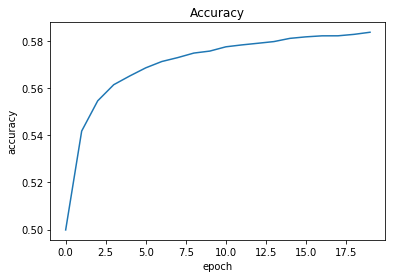

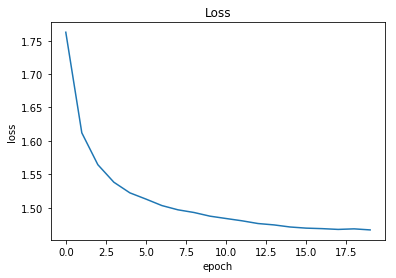

In [38]:
import matplotlib.pyplot as plt

with open("text_generation_history", 'rb') as hist_file:
    history = pickle.load(hist_file)
    
plt.plot(history['acc'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()
# summarize history for loss
plt.plot(history['loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()